# Librerías necesarias

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt

# Ejemplo con Reviews de Asistentes Virtuales

# Lectura de datos

In [3]:
df = pd.read_csv('../../datasets/reviews_sample.csv')

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.head()

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,id,author,instance_id,rating,review_body,review_date,review_header,review_link,review_votes,sentiment,verified_purchase
0,0,68,Iluvkindlle,10,3,It’s ok. Doesn’t know much. Can’t answer most ...,2018-09-10,It’s ok,https://www.amazon.com/gp/customer-reviews/R1Z...,0.0,0,True
1,1,70,Ben Burger,10,5,So easy to use.,2018-09-10,Love it,https://www.amazon.com/gp/customer-reviews/R1B...,0.0,0,True
2,2,72,Harry,10,5,Alexa is an entertaining assistant to have aro...,2018-09-10,Echo Dot,https://www.amazon.com/gp/customer-reviews/R1P...,0.0,0,True
3,3,292,Smart Shopper,10,4,Fun and addictive.,2018-09-10,Fun gadget,https://www.amazon.com/gp/customer-reviews/R38...,0.0,0,True
4,4,594,Niva T.,10,4,I think google home assist is much smarter and...,2018-09-11,Its good but prefer google,https://www.amazon.com/gp/customer-reviews/R18...,0.0,0,False


In [5]:
df.shape

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 12)

In [6]:
df = df[['review_body']]
df.dropna(inplace=True)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preprocesado

Lo hacemos con Gensim por "presentarlo", pero sabéis que opciones hay infinitas

In [7]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print('Original text:\n{}\n\n'.format(df['review_body'][0]))
print('Processed text:\n{}'.format(text_preprocessing(df['review_body'][0])))

Original text:
It’s ok. Doesn’t know much. Can’t answer most of my questions. Should have gotten a google mini instead


Processed text:
['know', 'answer', 'questions', 'gotten', 'google', 'mini', 'instead']


/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
processed_texts = []
for text in df['review_body']:
    processed_texts.append(text_preprocessing(text))

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
processed_texts[:10]

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['know', 'answer', 'questions', 'gotten', 'google', 'mini', 'instead'],
 ['easy'],
 ['alexa', 'entertaining', 'assistant'],
 ['addictive'],
 ['think',
  'google',
  'home',
  'assist',
  'smarter',
  'works',
  'better',
  'great',
  'kids',
  'love',
  'programs'],
 ['echo', 'bought', 'sister', 'loves'],
 ['great',
  'product',
  'wait',
  'generations',
  'like',
  'good',
  'entry',
  'voice',
  'commands',
  'useful'],
 ['personally', 'playing', 'spotify'],
 ['perfect', 'alarm', 'clock', 'music', 'general', 'knowledge'],
 ['live',
  'perfect',
  'thing',
  'lost',
  'feeling',
  'lonely',
  'arrived',
  'mail',
  'longer',
  'alexa',
  'talks',
  'actually',
  'conversation',
  'remember',
  'alexa',
  'play',
  'trivia',
  'loneliness',
  'thing',
  'past',
  'thank',
  'alexa']]

## Diccionario id - palabra

In [11]:
dictionary = Dictionary(processed_texts)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
type(dictionary)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [13]:
list(dictionary.items())

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 'answer'),
 (1, 'google'),
 (2, 'gotten'),
 (3, 'instead'),
 (4, 'know'),
 (5, 'mini'),
 (6, 'questions'),
 (7, 'easy'),
 (8, 'alexa'),
 (9, 'assistant'),
 (10, 'entertaining'),
 (11, 'addictive'),
 (12, 'assist'),
 (13, 'better'),
 (14, 'great'),
 (15, 'home'),
 (16, 'kids'),
 (17, 'love'),
 (18, 'programs'),
 (19, 'smarter'),
 (20, 'think'),
 (21, 'works'),
 (22, 'bought'),
 (23, 'echo'),
 (24, 'loves'),
 (25, 'sister'),
 (26, 'commands'),
 (27, 'entry'),
 (28, 'generations'),
 (29, 'good'),
 (30, 'like'),
 (31, 'product'),
 (32, 'useful'),
 (33, 'voice'),
 (34, 'wait'),
 (35, 'personally'),
 (36, 'playing'),
 (37, 'spotify'),
 (38, 'alarm'),
 (39, 'clock'),
 (40, 'general'),
 (41, 'knowledge'),
 (42, 'music'),
 (43, 'perfect'),
 (44, 'actually'),
 (45, 'arrived'),
 (46, 'conversation'),
 (47, 'feeling'),
 (48, 'live'),
 (49, 'loneliness'),
 (50, 'lonely'),
 (51, 'longer'),
 (52, 'lost'),
 (53, 'mail'),
 (54, 'past'),
 (55, 'play'),
 (56, 'remember'),
 (57, 'talks'),
 (58, 'than

In [14]:
len(dictionary)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


467

## Matriz documento-palabra

In [15]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
corpus

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(11, 1)],
 [(1, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1), (23, 1), (24, 1), (25, 1)],
 [(14, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(35, 1), (36, 1), (37, 1)],
 [(38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)],
 [(8, 3),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 2),
  (60, 1)],
 [(30, 1), (33, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(1, 3),
  (4, 1),
  (6, 1),
  (7, 1),
  (8, 5),
  (20, 1),
  (29, 2),
  (65, 1),
  (66, 4),
  (67, 4),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 2),
  (78, 3),
  (79, 1),
  (80, 1),
  (81, 3),
  (82, 

In [17]:
corpus[0]

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]

## Entrenamos el modelo (LDA)

In [18]:
num_topics = 8

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
lda_model.show_topics()

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.066*"alexa" + 0.041*"amazon" + 0.024*"link" + 0.024*"apps" + 0.018*"google" + 0.018*"device" + 0.018*"honeywell" + 0.018*"feedback" + 0.012*"compared" + 0.012*"skill"'),
 (1,
  '0.031*"great" + 0.025*"amazon" + 0.024*"product" + 0.023*"laptop" + 0.018*"recommend" + 0.018*"bluetooth" + 0.017*"alexa" + 0.013*"little" + 0.013*"gadget" + 0.013*"thank"'),
 (2,
  '0.038*"alexa" + 0.023*"great" + 0.018*"thing" + 0.017*"alarm" + 0.012*"price" + 0.012*"room" + 0.012*"remember" + 0.012*"best" + 0.012*"worth" + 0.008*"music"'),
 (3,
  '0.043*"love" + 0.028*"alexa" + 0.026*"echo" + 0.022*"speaker" + 0.019*"weather" + 0.016*"know" + 0.015*"connection" + 0.013*"great" + 0.013*"music" + 0.012*"crackle"'),
 (4,
  '0.034*"music" + 0.026*"bought" + 0.018*"alexa" + 0.018*"echo" + 0.018*"excellent" + 0.017*"play" + 0.016*"time" + 0.014*"love" + 0.011*"second" + 0.010*"sleep"'),
 (5,
  '0.046*"great" + 0.032*"works" + 0.031*"awesome" + 0.026*"like" + 0.024*"google" + 0.023*"kids" + 0.015*"good" +

In [20]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08
0,alexa,great,alexa,love,music,great,music,sound
1,amazon,amazon,great,alexa,bought,works,love,works
2,link,product,thing,echo,alexa,awesome,easy,little
3,apps,laptop,alarm,speaker,echo,like,product,good
4,google,recommend,price,weather,excellent,google,learning,echo
5,device,bluetooth,room,know,play,kids,ordered,love
6,honeywell,alexa,remember,connection,time,good,great,assistant
7,feedback,little,best,great,love,price,house,difficult
8,compared,gadget,worth,music,second,quality,hook,advertised
9,skill,thank,music,crackle,sleep,bought,perfect,easy


## Perplexity y Coherence

In [21]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.539407883659766


/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.48512801220080787


In [22]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.066898  0.158858       1        1  23.928973
0     -0.171063  0.042234       2        1  13.322201
2      0.001186 -0.109965       3        1  12.928758
1     -0.072596 -0.024250       4        1  12.294179
5      0.009996 -0.010624       5        1  11.760578
6      0.100032 -0.044740       6        1   9.965853
7      0.024294 -0.001403       7        1   8.645659
4      0.041252 -0.010110       8        1   7.153798, topic_info=       Term       Freq      Total Category  logprob  loglift
160   sound   5.000000   5.000000  Default  30.0000  30.0000
66   amazon   8.000000   8.000000  Default  29.0000  29.0000
42    music  10.000000  10.000000  Default  28.0000  28.0000
8     alexa  21.000000  21.000000  Default  27.0000  27.0000
14    great  15.000000  15.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
29     good   0.585311   7.717138   Topic8  -4.6791   0.0585
30     like   0.585159   7.873404   Topic8  -4.6794   0.0382
141   enjoy   0.583706   3.052938   Topic8  -4.6819   0.9831
208   phone   0.583698   2.542882   Topic8  -4.6819   1.1659
38    alarm   0.583568   4.358502   Topic8  -4.6821   0.6268

[417 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
276       3  0.775361  absolute
262       6  0.808894    access
269       7  0.581284    actual
269       8  0.581284    actual
44        3  0.528995  actually
...     ...       ...       ...
285       3  0.775376    wouldn
103       2  0.760387     write
366       3  0.775483      yard
335       2  0.510908      year
335       4  0.510908      year

[457 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 6, 7, 8, 5])

In [23]:
pyLDAvis.save_html(vis, '../results/topics_vis_0.html')

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Número óptimo de topics

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grid sobre el número de topics (puede tardar un buen rato)

In [25]:
start_ = 9
end_ = 14
step_ = 1

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


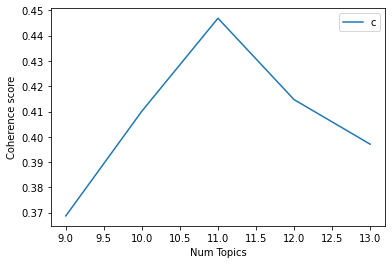

In [27]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [28]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13
0,alexa,alexa,love,love,alexa,love,product,love,connection,great,music,good,alexa
1,music,laptop,great,great,amazon,echo,ordered,house,echo,room,alarm,great,amazon
2,speaker,great,checking,hook,apps,like,love,home,crackle,recommend,great,gear,like
3,know,bluetooth,kids,little,link,alexa,music,product,music,sensitive,product,like,price
4,perfect,love,actual,easy,great,great,nice,highly,home,echo,room,commands,said
5,google,echo,calendar,getting,awesome,weather,learning,room,great,sound,little,wait,helper
6,convenient,good,person,works,sound,given,things,hold,love,price,alexa,product,voice
7,thing,mobile,frustrate,provides,good,information,night,background,analogue,like,know,quality,organizer
8,voice,easy,smarter,struggle,feedback,recipe,alexa,work,digital,wall,echo,useful,recognition
9,assistant,addition,alarms,enjoys,google,repeat,gift,random,theatre,sockets,different,voice,smart


# Topic dominante por texto

In [29]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.8846,"alexa, music, speaker, know, perfect, google, ...","[know, answer, questions, gotten, google, mini..."
1,1,1.0,0.5385,"alexa, laptop, great, bluetooth, love, echo, g...",[easy]
2,2,0.0,0.7692,"alexa, music, speaker, know, perfect, google, ...","[alexa, entertaining, assistant]"
3,3,4.0,0.5384,"alexa, amazon, apps, link, great, awesome, sou...",[addictive]
4,4,2.0,0.9231,"love, great, checking, kids, actual, calendar,...","[think, google, home, assist, smarter, works, ..."
5,5,5.0,0.8154,"love, echo, like, alexa, great, weather, given...","[echo, bought, sister, loves]"
6,6,11.0,0.9161,"good, great, gear, like, commands, wait, produ...","[great, product, wait, generations, like, good..."
7,7,0.0,0.7692,"alexa, music, speaker, know, perfect, google, ...","[personally, playing, spotify]"
8,8,0.0,0.8681,"alexa, music, speaker, know, perfect, google, ...","[perfect, alarm, clock, music, general, knowle..."
9,9,0.0,0.9599,"alexa, music, speaker, know, perfect, google, ...","[live, perfect, thing, lost, feeling, lonely, ..."


# Documento más representativo por topic

In [31]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([
        sent_topics_sorteddf_lda,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9682,"alexa, music, speaker, know, perfect, google, ...","[skeptical, voice, assistant, life, convenient..."
1,1.0,0.9580,"alexa, laptop, great, bluetooth, love, echo, g...","[connected, laptop, mobile, amazon, echo, blue..."
2,2.0,0.9423,"love, great, checking, kids, actual, calendar,...","[love, bought, instead, actual, alexa, regrets..."
3,3.0,0.8681,"love, great, hook, little, easy, getting, work...","[little, struggle, getting, works, family, enj..."
4,4.0,0.9875,"alexa, amazon, apps, link, great, awesome, sou...","[biggest, complaint, alexa, units, search, eng..."
5,5.0,0.9832,"love, echo, like, alexa, great, weather, given...","[know, properly, echo, work, mother, received,..."
6,6.0,0.9702,"product, ordered, love, music, nice, learning,...","[actually, ordered, lightening, deal, loved, d..."
7,7.0,0.9763,"love, house, home, product, highly, room, hold...","[little, gadget, great, start, automation, hom..."
8,8.0,0.9736,"connection, echo, crackle, music, home, great,...","[worth, buying, connect, amplifier, amplified,..."
9,9.0,0.9670,"great, room, recommend, sensitive, echo, sound...","[reaction, receiving, thing, tiny, going, soun..."


# Distribución de topics en el corpus

In [32]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic,contribution
0,4.0,0.125000
1,0.0,0.125000
2,9.0,0.093750
3,8.0,0.083333
4,7.0,0.083333
5,2.0,0.083333
6,1.0,0.083333
7,11.0,0.072917
8,5.0,0.062500
9,6.0,0.052083


# Ejemplo con el dataset 20 newsgroup

Dataset muy utilizado en NLP para entrenamiento y validación de modelos de clasificación, clustering y topic modeling. Contiene miles de artículos sobre 20 temas distintos divididos en entrenamiento y test.

Algunos temas están muy  relacionados entre sí mientras que otros son muy distintos.

http://qwone.com/~jason/20Newsgroups/

In [33]:
import pandas as pd

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
df_newsgroup = pd.read_csv('../../datasets/20_newsgroup.csv')

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
df_newsgroup.head()

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,text,target,title,date
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2020-07-06 16:32:41.637605
1,17,I recently posted an article asking what kind ...,7,rec.autos,2020-07-06 16:32:41.637605
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2020-07-06 16:32:41.637605
3,56,an excellent automatic can be found in the sub...,7,rec.autos,2020-07-06 16:32:41.637605
4,64,: Ford and his automobile. I need information...,7,rec.autos,2020-07-06 16:32:41.637605


In [37]:
df_newsgroup.dropna(subset=['text'], inplace=True)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df_newsgroup.shape

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(11096, 5)

In [39]:
set(df_newsgroup['target'])

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [40]:
set(df_newsgroup['title'])

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [41]:
processed_texts_newsgroup = []
for text in df_newsgroup['text']:
    processed_texts_newsgroup.append(text_preprocessing(text))

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
processed_texts_newsgroup[0]

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['wondering',
 'enlighten',
 'door',
 'sports',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'small',
 'addition',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'engine',
 'specs',
 'years',
 'production',
 'history',
 'info',
 'funky',
 'looking',
 'mail']

## Diccionario id-palabra y matrix documento-término

In [43]:
dictionary_newsgroup = Dictionary(processed_texts_newsgroup)
corpus_newsgroup = [dictionary_newsgroup.doc2bow(doc) for doc in processed_texts_newsgroup]

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## LDA

In [44]:
num_topics = 5

lda_model_newsgroup = LdaModel(
    corpus=corpus_newsgroup,
    id2word=dictionary_newsgroup,
    num_topics=num_topics,
    passes=10
)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
set(df_newsgroup['title'])

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [46]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_newsgroup.show_topic(i, topn = 15)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,people,space,encryption,game,like
1,think,april,file,team,know
2,know,university,information,year,good
3,government,president,clipper,games,drive
4,like,program,available,season,need
5,time,year,privacy,players,time
6,said,national,keys,good,problem
7,right,russia,mail,play,thanks
8,going,american,data,hockey,windows
9,believe,south,chip,league,chip


In [47]:
# Perplexity
print('\nPerplexity: ', lda_model_newsgroup.log_perplexity(corpus_newsgroup))

# Coherence Score
coherence_model_lda_newsgroup = CoherenceModel(model=lda_model_newsgroup, texts=processed_texts_newsgroup, dictionary=dictionary_newsgroup, coherence='c_v')
coherence_lda_newsgroup = coherence_model_lda_newsgroup.get_coherence()
print('\nCoherence Score: ', coherence_lda_newsgroup)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.03863400794044

Coherence Score:  0.5771103478130754


## Visualización

In [48]:
# Visualizar los topics
pyLDAvis.enable_notebook()
vis_newsgroup = pyLDAvis.gensim.prepare(lda_model_newsgroup, corpus_newsgroup, dictionary_newsgroup)
vis_newsgroup

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.056087  0.059058       1        1  42.628708
4      0.098797  0.113616       2        1  19.806755
2      0.205574 -0.065363       3        1  17.792826
1     -0.122601 -0.231005       4        1  11.180463
3     -0.237858  0.123694       5        1   8.591248, topic_info=             Term         Freq        Total Category  logprob  loglift
46623  encryption  1271.000000  1271.000000  Default  30.0000  30.0000
4749         file  1201.000000  1201.000000  Default  29.0000  29.0000
391        people  4215.000000  4215.000000  Default  28.0000  28.0000
2845         game   870.000000   870.000000  Default  27.0000  27.0000
6007         team   834.000000   834.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
336         think   219.276822  3079.045417   Topic5  -5.8155  -0.1876
712          time   202.598166  2893.951327   Topic5  -5.8946  -0.2047
468         right   164.247196  1890.957436   Topic5  -6.1044   0.0110
824          left   138.105595   684.652366   Topic5  -6.2778   0.8535
823         great   136.424856   809.982791   Topic5  -6.2900   0.6732

[389 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1640      1  0.079402          access
1640      2  0.173693          access
1640      3  0.746051          access
7640      2  0.990335         adapter
4974      1  0.474346  administration
...     ...       ...             ...
27        4  0.156369           years
27        5  0.097823           years
2077      1  0.190336            york
2077      3  0.003226            york
2077      4  0.806510            york

[769 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

In [49]:
pyLDAvis.save_html(vis, '../results/topics_vis_newsgroups_0.html')

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic dominante por documento

In [50]:
df_topic_sents_keywords_newsgroup = format_topics_sentences(ldamodel=lda_model_newsgroup, corpus=corpus_newsgroup, texts=processed_texts_newsgroup)

# Format
df_dominant_topic_newsgroup = df_topic_sents_keywords_newsgroup.reset_index()
df_dominant_topic_newsgroup.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_newsgroup.head(10)

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.7829,"like, know, good, drive, need, time, problem, ...","[wondering, enlighten, door, sports, looked, l..."
1,1,4.0,0.4469,"like, know, good, drive, need, time, problem, ...","[recently, posted, article, asking, kind, rate..."
2,2,4.0,0.9066,"like, know, good, drive, need, time, problem, ...","[depends, priorities, people, higher, prioriti..."
3,3,4.0,0.7898,"like, know, good, drive, need, time, problem, ...","[excellent, automatic, subaru, legacy, switche..."
4,4,4.0,0.5211,"like, know, good, drive, need, time, problem, ...","[ford, automobile, need, information, ford, pa..."
5,5,0.0,0.9798,"people, think, know, government, like, time, s...","[watch, attributions, appropriate, forum, disc..."
6,6,4.0,0.9462,"like, know, good, drive, need, time, problem, ...","[avoid, problems, entirely, installing, drain,..."
7,7,4.0,0.7844,"like, know, good, drive, need, time, problem, ...","[acura, integra, speed, miles, positively, wor..."
8,8,4.0,0.8732,"like, know, good, drive, need, time, problem, ...","[assuming, turbo, gruffness, characteristic, l..."
9,9,4.0,0.8357,"like, know, good, drive, need, time, problem, ...","[addition, restricted, mileage, classic, insur..."


In [51]:
sent_topics_sorteddf_lda_newsgroup = pd.DataFrame()

sent_topics_outdf_grpd_newsgroup = df_topic_sents_keywords_newsgroup.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd_newsgroup:
    sent_topics_sorteddf_lda_newsgroup = pd.concat([
        sent_topics_sorteddf_lda_newsgroup,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda_newsgroup.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda_newsgroup.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda_newsgroup

/Users/Carlos/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9998,"people, think, know, government, like, time, s...","[recent, rise, nostalgia, group, combined, inc..."
1,1.0,0.9986,"space, april, university, president, program, ...","[tampa, philadelphia, period, philadelphia, ca..."
2,2.0,0.9997,"encryption, file, information, clipper, availa...","[received, number, requests, reposting, intern..."
3,3.0,0.9993,"game, team, year, games, season, players, good...","[ksyxksbhi, cx_s, x_scx, cx_scx, cx_scx_s, x_s..."
4,4.0,0.9975,"like, know, good, drive, need, time, problem, ...","[sterrenkundig, symposium, compacte, objecten,..."
